In [1]:
#Importamos librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [2]:
#Leemos el archivo de datos metorológicos de la estación de Nogal
df1 = pd.DataFrame( pd.read_csv("meteo-nogal-09.csv", engine="python" ) )
df1.head()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1.dtypes

DATE            object
TIME            object
Unnamed: 2     float64
Unnamed: 3     float64
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
Unnamed: 18    float64
Unnamed: 19     object
Unnamed: 20     object
Unnamed: 21    float64
Unnamed: 22     object
Unnamed: 23     object
Unnamed: 24     object
Unnamed: 25     object
Unnamed: 26     object
Unnamed: 27     object
Unnamed: 28     object
Unnamed: 29     object
Unnamed: 30     object
Unnamed: 31     object
Unnamed: 32     object
Unnamed: 33     object
Unnamed: 34     object
Unnamed: 35     object
dtype: object

In [4]:
#Eliminamos las columnas nombradas 'unnamed'. Elimnamos el primer renglón.
df1=df1.drop(df1.columns[df1.columns.str.contains('unnamed:',case = False)],axis = 1)
df1 = df1.drop(df1.index[0]).reset_index(drop=True)
df1.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
1,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
2,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
3,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737
4,01-01-09,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39


In [5]:
df1.dtypes

DATE            object
TIME            object
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
dtype: object

In [6]:
#Creamos la variable FECHAN a partir de DATE y TIME. Desechamos dichas columnas.
df1["FECHAN"] = df1["DATE"] +" "+ df1["TIME"]
df1.drop( ["DATE","TIME"], axis=1, inplace=True )

In [7]:
#Convertimos la variable FECHAN a la variable FECHA de tipo datetime
df1['FECHA'] = pd.to_datetime(df1.apply(lambda x: x['FECHAN'], 1), dayfirst=True)
df1 = df1.drop(['FECHAN'], 1)
df1.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01 00:10:00
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01 00:20:00
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00


In [8]:
df1.dtypes

u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
FECHA          datetime64[ns]
dtype: object

In [9]:
#Extraemos una columna de minutos del data frame
df1['MES'] = df1['FECHA'].dt.month
df1['DIA'] = df1['FECHA'].dt.day
df1['HORA'] = df1['FECHA'].dt.hour
df1['MINUTO'] = df1['FECHA'].dt.minute
df1.head(50)

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA,MES,DIA,HORA,MINUTO
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01 00:10:00,1.0,1.0,0.0,10.0
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01 00:20:00,1.0,1.0,0.0,20.0
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00,1.0,1.0,0.0,30.0
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00,1.0,1.0,0.0,40.0
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00,1.0,1.0,0.0,50.0
5,0.8850001,0.992,-0.167,8.76,1.45,-183.4,23.33,-26.98,1.39,8.34,0.840,1.097,0.9210001,7.089,2009-01-01 01:00:00,1.0,1.0,1.0,0.0
6,0.611,0.7270001,-0.126,8.72,1.5,-180.6,23.71,-26.72,0.9820001,8.16,0.832,1.084,0.901,6.943,2009-01-01 01:10:00,1.0,1.0,1.0,10.0
7,0.33,0.886,-0.086,8.8,1.49,-185.3,23.63,-26.65,0.9960001,7.888,0.838,1.064,0.892,6.878,2009-01-01 01:20:00,1.0,1.0,1.0,20.0
8,0.118,1.321,-0.071,8.69,1.422,-187.8,24.04,-27.16,1.338,7.539001,0.846,1.039,0.8790001,6.787,2009-01-01 01:30:00,1.0,1.0,1.0,30.0
9,0.056,1.315,-0.081,7.892,1.324,-186.5,23.63,-25.91,1.331,7.163,0.876,1.012,0.886,6.852,2009-01-01 01:40:00,1.0,1.0,1.0,40.0


In [10]:
#Quitamos los dos primeros renglones ya que a partir del tercero los dos data frames contienen los mismos datos
df1 = df1.drop(df1.index[0:2]).reset_index(drop=True)
df1.head(15)

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA,MES,DIA,HORA,MINUTO
0,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00,1.0,1.0,0.0,30.0
1,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00,1.0,1.0,0.0,40.0
2,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00,1.0,1.0,0.0,50.0
3,0.8850001,0.992,-0.167,8.76,1.45,-183.4,23.33,-26.98,1.39,8.34,0.840,1.097,0.9210001,7.089,2009-01-01 01:00:00,1.0,1.0,1.0,0.0
4,0.611,0.7270001,-0.126,8.72,1.5,-180.6,23.71,-26.72,0.9820001,8.16,0.832,1.084,0.901,6.943,2009-01-01 01:10:00,1.0,1.0,1.0,10.0
5,0.33,0.886,-0.086,8.8,1.49,-185.3,23.63,-26.65,0.9960001,7.888,0.838,1.064,0.892,6.878,2009-01-01 01:20:00,1.0,1.0,1.0,20.0
6,0.118,1.321,-0.071,8.69,1.422,-187.8,24.04,-27.16,1.338,7.539001,0.846,1.039,0.8790001,6.787,2009-01-01 01:30:00,1.0,1.0,1.0,30.0
7,0.056,1.315,-0.081,7.892,1.324,-186.5,23.63,-25.91,1.331,7.163,0.876,1.012,0.886,6.852,2009-01-01 01:40:00,1.0,1.0,1.0,40.0
8,0.327,1.287,-0.115,8.02,1.328,-180.5,22.78,-24.45,1.355,6.914001,0.894,0.9950001,0.89,6.884,2009-01-01 01:50:00,1.0,1.0,1.0,50.0
9,0.7550001,1.193,-0.149,7.612,1.36,-174,20.87,-21.68,1.457,6.76,0.902,0.9850001,0.8880001,6.876,2009-01-01 02:00:00,1.0,1.0,2.0,0.0


In [11]:
#Nos quedamos con los datos cada 30 minutos
df1 = df1[((df1['MINUTO'] == 30.0) | (df1['MINUTO'] == 0.0) ) & (df1['FECHA']<'2009-12-31 02:30:00')]
df1= df1.reset_index(drop=True)
df1.tail(7)

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA,MES,DIA,HORA,MINUTO
17395,0.643,-0.071,11.72,1228,-58.91,NAN,NAN,1.758,10.88,0.509,1.302,0.662,5.05,NaN,2009-12-30 23:00:00,12.0,30.0,23.0,0.0
17396,0.355,-0.014,11.59,1240,-59.41,NAN,NAN,1.709,11.15,0.504,1.325,0.668,5.089,NaN,2009-12-30 23:30:00,12.0,30.0,23.0,30.0
17397,0.503,-0.043,11.03,1289,-56.06,NAN,NAN,1.608,10.63,0.49,1.279,0.627,4.789,NaN,2009-12-31 00:00:00,12.0,31.0,0.0,0.0
17398,0.82,-0.095,11.38,1284,-54,NAN,NAN,1.739,10.64,0.49,1.281,0.628,4.792,NaN,2009-12-31 00:30:00,12.0,31.0,0.0,30.0
17399,0.844,-0.116,11.3,1271,-48.06,NAN,NAN,1.384,10.47,0.492,1.266,0.623,4.76,NaN,2009-12-31 01:00:00,12.0,31.0,1.0,0.0
17400,1.155,-0.132,10.01,1293,-55,NAN,NAN,1.323,9.47,0.522,1.185,0.618,4.739,NaN,2009-12-31 01:30:00,12.0,31.0,1.0,30.0
17401,1.261,-0.161,9.06,1292,-53.93,NAN,NAN,1.796,9.25,0.528,1.167,0.616,4.728,NaN,2009-12-31 02:00:00,12.0,31.0,2.0,0.0


In [12]:
#Leemos el segundo archivo sobre los datos del suelo
df2 = pd.DataFrame( pd.read_csv("soil-nogal-09.csv", engine="python" ) )
df2.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Revisamos el tipo de variables
df2.dtypes

id                        int64
2 Year_RTM  L             int64
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L      int64
5 T108v_1_AVG  L        float64
6 T108v_2_AVG  L        float64
7 T108v_3_AVG  L        float64
8 T108v_4_AVG  L        float64
9 T108v_5_AVG  L        float64
10 T108v_6_AVG  L       float64
11 T108v_7_AVG  L       float64
12 T108v_8_AVG  L       float64
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
21 Tref_AVG  L          float64
22 period_1  L          float64
23 period_2  L          float64
24 period_3  L          float64
25 period_4  L          float64
26 period_5  L          float64
27 period_6  L          float64
28 period_7  L          float64
29 period_8  L          float64
30 TVWC_1  L            float64
                         ...   
35 TVWC_

In [14]:
#Filtramos las columnas de interés
df2 = df2.filter(['2 Year_RTM  L','3 Day_RTM  L','4 Hour_Minute_RTM  L','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm'
                  ,'Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'],axis=1)
df2.head()

,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,2009,1,30,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,2009,1,100,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,2009,1,130,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,2009,1,200,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,2009,1,230,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


In [15]:
#Para hacer una variable de fecha, tenemos que crear dos arreglos, uno  con horas y otro de minutos.
#Para esto converctimos la columna '4 Hour_Minute_RTM  L' a tipo string.
df2['4 Hour_Minute_RTM  L'] = df2['4 Hour_Minute_RTM  L'].astype(str)

In [16]:
#Ahora llenaremos el arreglo de horas y de minutos.

hora=[]
minuto=[]

for i in range (0, len(df2)):
    #Primero revisaremos si contiene 4 caracteres.
    if (len(str(df2['4 Hour_Minute_RTM  L'][i]))==4):
        #Si resulta ser de 4 caracteres, revisaremos el caso en que la hora sea 2400.
        if (str(df2['4 Hour_Minute_RTM  L'][i])[0:2]=='24'):
            hora.append('00')
            minuto.append('00')
        else:
            hora.append(str(df2['4 Hour_Minute_RTM  L'][i])[0:2])
            minuto.append(str(df2['4 Hour_Minute_RTM  L'][i])[2:4])
    #Ahora revisamos el caso de que contenga 3 caracteres.
    elif (len(str(df2['4 Hour_Minute_RTM  L'][i]))==3):
            hora.append(str(df2['4 Hour_Minute_RTM  L'][i])[0:1])
            minuto.append(str(df2['4 Hour_Minute_RTM  L'][i])[1:3])
    #Por último revisaremos el caso de 2 caracteres.
    elif (len(str(df2['4 Hour_Minute_RTM  L'][i]))==2):
            hora.append('00')
            minuto.append(str(df2['4 Hour_Minute_RTM  L'][i])[0:2])

#Arreglo para los días
dias =[df2['3 Day_RTM  L'][i] for i in range(0,len(df2))]

In [17]:
#Creamos un data frame con las horas, minutos y días del df2
d = {'dias': dias, 'hora': hora, 'minuto':minuto}
df_fechas = pd.DataFrame(data=d)
df_fechas.head()

,dias,hora,minuto
0,1,00,30
1,1,1,00
2,1,1,30
3,1,2,00
4,1,2,30


In [18]:
df_fechas.dtypes

dias       int64
hora      object
minuto    object
dtype: object

In [19]:
#En la nueva columna "dia", aumentamos un día a "dias" cuando marque la hora 00:00
dia=[]
for i in range(0,len(df_fechas)):
    if (df_fechas['hora'][i]=='00' and df_fechas['minuto'][i]=='00'):
        dia.append(df_fechas['dias'][i] +1)
    else:
        dia.append(df_fechas['dias'][i])
df_fechas['dia']=dia

In [20]:
df_fechas.head(50)

,dias,hora,minuto,dia
0,1,00,30,1
1,1,1,00,1
2,1,1,30,1
3,1,2,00,1
4,1,2,30,1
5,1,3,00,1
6,1,3,30,1
7,1,4,00,1
8,1,4,30,1
9,1,5,00,1


In [21]:
#Creamos una variable de tipo string con el año, el número de día, la hora y el minuto
fechas = []
for i in range (0,len(df2)):
    fechas.append('2009 '+str(df_fechas['dia'][i])+ ' ' + df_fechas['hora'][i]+' '+df_fechas['minuto'][i])

In [22]:
#Convertimos los elementos del arreglo fechas a variables tipo datetime
FECHA = []
for i in range(0,len(df2)):
    d=datetime.datetime.strptime(fechas[i],'%Y %j %H %M')
    F = d.isoformat(' ')
    FECHA.append(F)

In [23]:
#Agregamos la columna FECHA al dataframe
df2['FECHAN']=FECHA
df2.tail(50)

,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,FECHAN
17432,2009,364,2330,13.75,14.06,14.80,15.24,15.76,16.62,17.35,18.22,2009-12-30 23:30:00
17433,2009,364,2400,13.73,14.06,14.81,15.25,15.76,16.62,17.35,18.21,2009-12-31 00:00:00
17434,2009,365,30,13.71,14.06,14.83,15.24,15.75,16.62,17.35,18.21,2009-12-31 00:30:00
17435,2009,365,100,13.69,14.06,14.83,15.24,15.76,16.62,17.35,18.21,2009-12-31 01:00:00
17436,2009,365,130,13.66,14.06,14.83,15.24,15.76,16.62,17.35,18.21,2009-12-31 01:30:00
17437,2009,365,200,13.64,14.06,14.83,15.24,15.75,16.62,17.34,18.21,2009-12-31 02:00:00
17438,2009,365,230,13.61,14.06,14.83,15.25,15.76,16.62,17.34,18.21,2009-12-31 02:30:00
17439,2009,365,300,13.58,14.06,14.84,15.26,15.76,16.62,17.34,18.21,2009-12-31 03:00:00
17440,2009,365,330,13.55,14.03,14.85,15.26,15.76,16.61,17.33,18.21,2009-12-31 03:30:00
17441,2009,365,400,13.52,14.03,14.86,15.27,15.76,16.60,17.33,18.21,2009-12-31 04:00:00


In [24]:
#Convertimos la columna FECHAN a tipo datetime
df2['FECHA'] = pd.to_datetime(df2.apply(lambda x: x['FECHAN'], 1), dayfirst=True)
df2 = df2.drop(['FECHAN'], 1)
df2.dtypes

2 Year_RTM  L                    int64
3 Day_RTM  L                     int64
4 Hour_Minute_RTM  L            object
Tsuelo_10cm                    float64
Tsuelo_20cm                    float64
Tsuelo_30cm                    float64
Tsuelo_40cm                    float64
Tsuelo_55cm                    float64
Tsuelo_70cm                    float64
Tsuelo_85cm                    float64
Tsuelo_100cm                   float64
FECHA                   datetime64[ns]
dtype: object

In [25]:
len(df2)

17482

In [26]:
#Quitamos los duplicados del df2
df2 = df2.drop_duplicates(subset=['FECHA'])

In [27]:
df1.dtypes

u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
FECHA          datetime64[ns]
MES                   float64
DIA                   float64
HORA                  float64
MINUTO                float64
dtype: object

In [28]:
len(df1)

17402

In [29]:
#Ahora uniremos los dos data frames, relacionados con la variable FECHA
df3 = pd.merge(df1, df2, on=['FECHA'])

In [31]:
df3.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,...,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
17375,0.503,-0.043,11.03,1289,-56.06,NAN,NAN,1.608,10.63,0.49,...,364,2400,13.73,14.06,14.81,15.25,15.76,16.62,17.35,18.21
17376,0.82,-0.095,11.38,1284,-54,NAN,NAN,1.739,10.64,0.49,...,365,30,13.71,14.06,14.83,15.24,15.75,16.62,17.35,18.21
17377,0.844,-0.116,11.3,1271,-48.06,NAN,NAN,1.384,10.47,0.492,...,365,100,13.69,14.06,14.83,15.24,15.76,16.62,17.35,18.21
17378,1.155,-0.132,10.01,1293,-55,NAN,NAN,1.323,9.47,0.522,...,365,130,13.66,14.06,14.83,15.24,15.76,16.62,17.35,18.21
17379,1.261,-0.161,9.06,1292,-53.93,NAN,NAN,1.796,9.25,0.528,...,365,200,13.64,14.06,14.83,15.24,15.75,16.62,17.34,18.21


In [32]:
#Nos quedamos con un data frame más pequeño, únicamente con las variables a graficar
df3 = df3.filter(['FECHA','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm'
                  ,'Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm','t_Avg','air_Avg','net_rad_Avg','airT_Avg'],axis=1)
df3.head()

,FECHA,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,t_Avg,net_rad_Avg,airT_Avg
0,2009-01-01 00:30:00,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62,10.34,-175.5,9.059999
1,2009-01-01 01:00:00,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62,8.76,-183.4,8.34
2,2009-01-01 01:30:00,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62,8.69,-187.8,7.539001
3,2009-01-01 02:00:00,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60,7.612,-174,6.76
4,2009-01-01 02:30:00,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60,7.761,-170.7,7.288001


In [33]:
len(df3)

17380

In [34]:
#Seleccionar un día de Enero, y graficar la temperatura del aire, y las 4 temperaturas del subsuelo.
#Graficaremos las temperaturas del primero de enero
df_graf1=df3[df3['FECHA']<'2009-01-02 00:00:00']
df_graf1_s = df_graf1.filter(['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_40cm',
                            'Tsuelo_85cm'],axis=1)

#Convertimos las variables object a float64 para poder operar con los números
df_graf1 = df_graf1.apply(pd.to_numeric, errors='coerce')
df_graf1_s.head()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm
0,14.36,14.70,15.52,17.75
1,14.33,14.70,15.52,17.75
2,14.28,14.69,15.54,17.74
3,14.24,14.69,15.55,17.74
4,14.19,14.69,15.55,17.73


<Figure size 864x595.44 with 0 Axes>

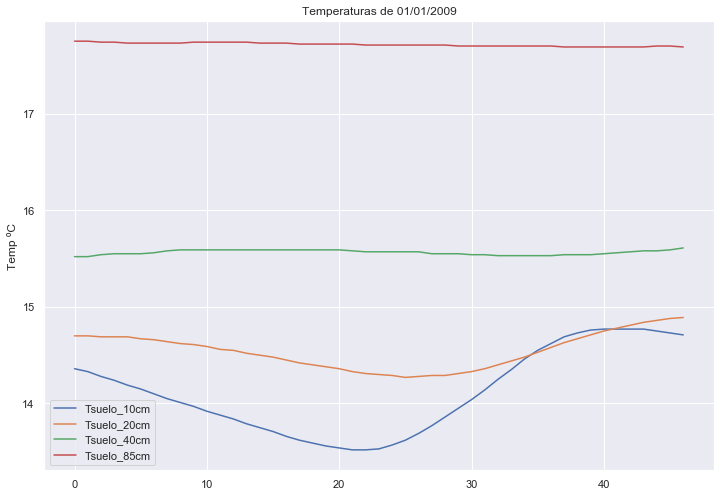

In [35]:
#Hacemos dos gráficas, una para las temperaturas del suelo ese día y otra para el aire

#Temperaturas del subsuelo par el 01/01/2009
sns.set(rc={'figure.figsize':(12,8.27)})

fig=plt.figure(); df_graf1_s.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 01/01/2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("Tsueloundia",plt=2000)

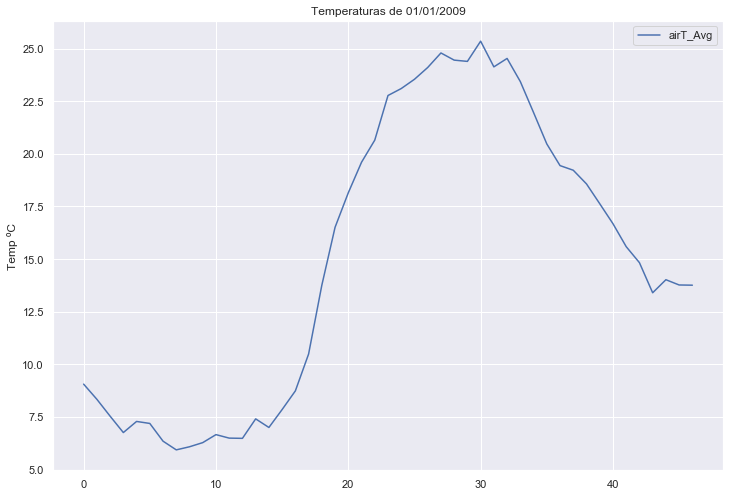

In [36]:
#Temperatura del aire para el 01/01/2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graf1["airT_Avg"].plot() ; plt.legend(loc='best')
plt.title("Temperaturas de 01/01/2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("Tairundia",plt=2000)

In [37]:
#Realizar una gráfica de temperaturas T_max, T_min y T_promedio diarias para el año completo de datos 2009. 

#Trabajaremos sobre un nuevo dataframe
df_graf2=df3

#Primero crearemos variables para día y mes
df_graf2['DIA']=df_graf2['FECHA'].dt.day
df_graf2['MES']=df_graf2['FECHA'].dt.month


#Creamos un data frame para cada una de las  4 temperaturas del suelo

#Data frame para Tsuelo_10cm 
df_10=df_graf2.filter(['DIA','MES','Tsuelo_10cm'],axis=1)
#Calculamos tmin, tmax y tmean
df_10["Tsuelo_10cm_max"] = np.round(df_10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("max"),decimals=1)
df_10["Tsuelo_10cm_min"] = np.round(df_10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("min"),decimals=1)
df_10["Tsuelo_10cm_mean"] = np.round(df_10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se grafican
df_10 = df_10.drop(['Tsuelo_10cm','DIA','MES'], 1)

#Data frame para Tsuelo_20cm 
df_20=df_graf2.filter(['DIA','MES','Tsuelo_20cm'],axis=1)
#Calculamos tmin, tmax y tmean
df_20["Tsuelo_20cm_max"] = np.round(df_20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("max"),decimals=1)
df_20["Tsuelo_20cm_min"] = np.round(df_20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("min"),decimals=1)
df_20["Tsuelo_20cm_mean"] = np.round(df_20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se grafican
df_20 = df_20.drop(['Tsuelo_20cm','DIA','MES'], 1)

#Data frame para Tsuelo_40cm 
df_40=df_graf2.filter(['DIA','MES','Tsuelo_40cm'],axis=1)
#Calculamos tmin, tmax y tmean
df_40["Tsuelo_40cm_max"] = np.round(df_40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("max"),decimals=1)
df_40["Tsuelo_40cm_min"] = np.round(df_40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("min"),decimals=1)
df_40["Tsuelo_40cm_mean"] = np.round(df_40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se grafican
df_40 = df_40.drop(['Tsuelo_40cm','DIA','MES'], 1)

#Data frame para Tsuelo_85cm 
df_85=df_graf2.filter(['DIA','MES','Tsuelo_85cm'],axis=1)
#Calculamos tmin, tmax y tmean
df_85["Tsuelo_85cm_max"] = np.round(df_85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("max"),decimals=1)
df_85["Tsuelo_85cm_min"] = np.round(df_85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("min"),decimals=1)
df_85["Tsuelo_85cm_mean"] = np.round(df_85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se grafican
df_85 = df_85.drop(['Tsuelo_85cm','DIA','MES'], 1)

<Figure size 864x595.44 with 0 Axes>

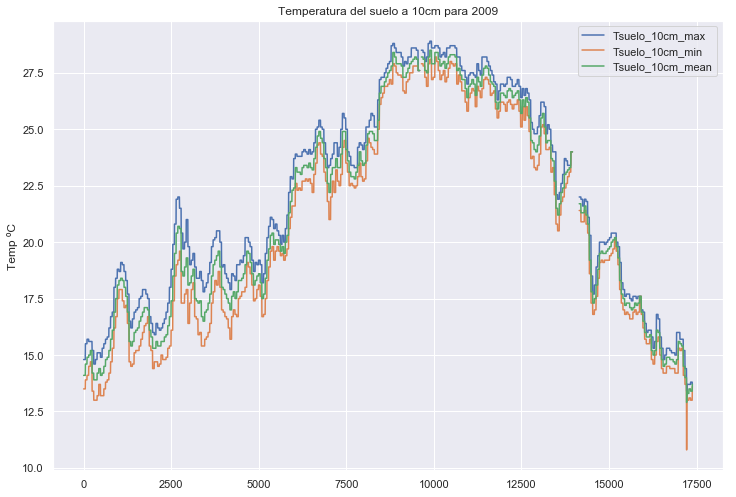

In [38]:
#Gráfica para Tsuelo_10cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_10.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T10",plt=2000)

<Figure size 864x595.44 with 0 Axes>

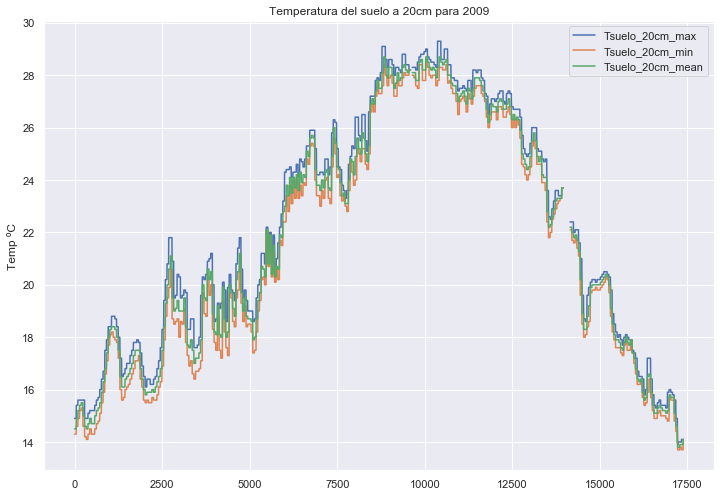

In [39]:
#Gráfica para Tsuelo_20cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_20.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 20cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T20",plt=2000)

<Figure size 864x595.44 with 0 Axes>

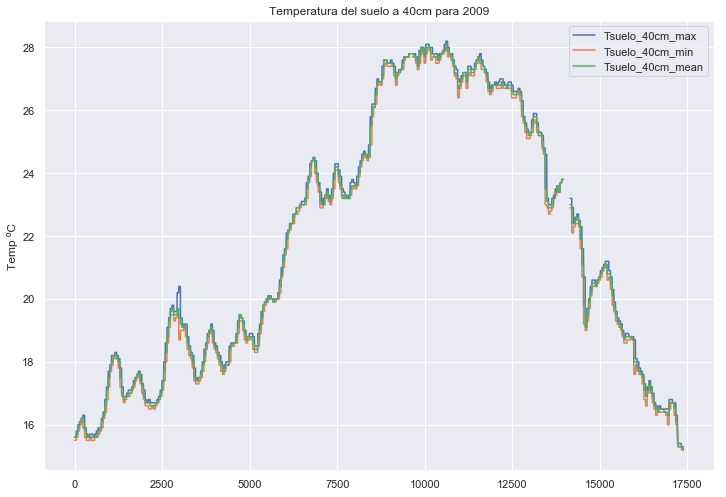

In [40]:
#Gráfica para Tsuelo_40cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_40.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 40cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T40",plt=2000)

<Figure size 864x595.44 with 0 Axes>

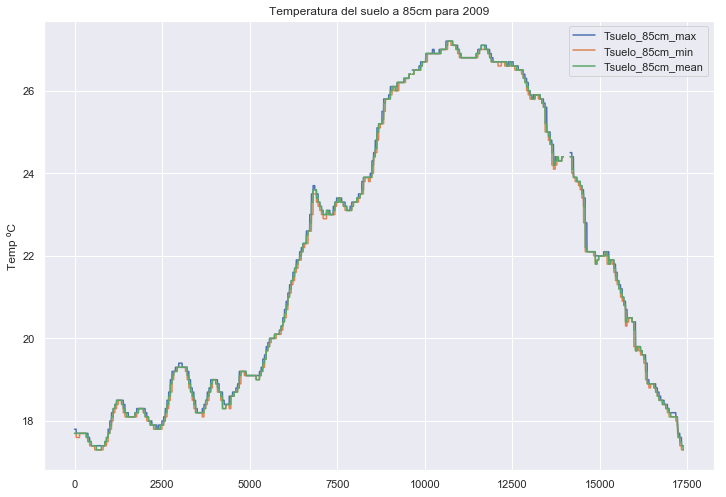

In [41]:
#Gráfica para Tsuelo_85cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_85.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 85cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T85",plt=2000)

In [42]:
#Realizamos la gráfica para la temperatura del aire

#Trabajamos sobre un data frame nuevo para esta gráfica, donde únicamente nos interesa la temperatura del aire
df_graf2=df_graf2.filter(['DIA','MES','airT_Avg'],axis=1)

df_graf2.head()

#Convertimos los datos a float 64
df_graf2[df_graf2.columns[1:3]]=df_graf2[df_graf2.columns[1:3]].apply(pd.to_numeric,errors='coerce')
df_graf2.dtypes

DIA           int64
MES           int64
airT_Avg    float64
dtype: object

In [43]:
#Agrupamos y usamos la función transform para obtener la temperatura máxima, mínima y promedio del aire
df_graf2["airT_Avg_max"] = np.round(df_graf2.groupby(["MES","DIA"])["airT_Avg"].transform("max"),decimals=1)
df_graf2["airT_Avg_min"] = np.round(df_graf2.groupby(["MES","DIA"])["airT_Avg"].transform("min"),decimals=1)
df_graf2["airT_Avg_mean"] = np.round(df_graf2.groupby(["MES","DIA"])["airT_Avg"].transform("mean"),decimals=1)

#Quitamos las columnas que no nos interesan para realizar la gráfica
df_graf2 = df_graf2.drop(['airT_Avg','DIA','MES'], 1)
df_graf2.head()

,airT_Avg_max,airT_Avg_min,airT_Avg_mean
0,25.4,5.9,15.0
1,25.4,5.9,15.0
2,25.4,5.9,15.0
3,25.4,5.9,15.0
4,25.4,5.9,15.0


<Figure size 864x595.44 with 0 Axes>

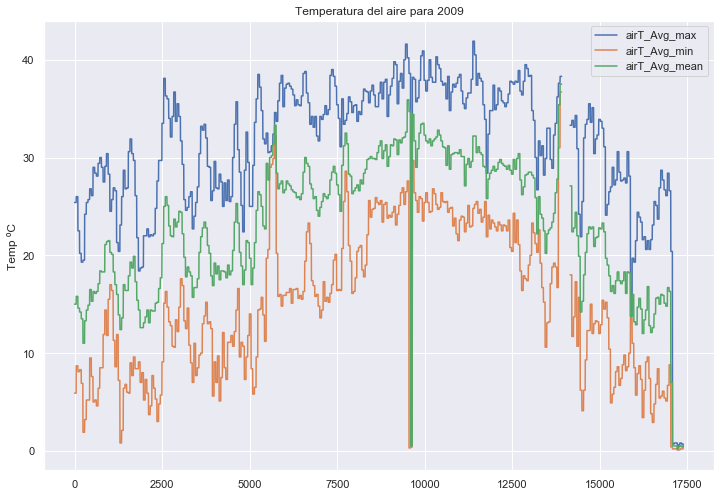

In [44]:
#Elaboramos la gráfica de la temperatura del aire promedio, máxima y mínima por día para todo 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graf2.plot() ; plt.legend(loc='best')
plt.title("Temperatura del aire para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("Tair2009",plt=2000)

In [45]:
#Calcular el promedio cada 30 minutos durante el día para el mes de Enero de 
#la temperatura del aire y las 8 temperaturas promedio de subsuelo, para posteriormente
#graficar la variación en 24 horas de las temperaturas de interés.

#Reducimos el data frame al mes de enero
df_graf3=df3[df3['FECHA']<'2009-02-01 00:00:00']

#Tomamos las temperaturas del suelo
df_graf3_s = df_graf3.filter(['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm',
                              'Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'],axis=1)
df_graf3_s.head()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


<Figure size 864x595.44 with 0 Axes>

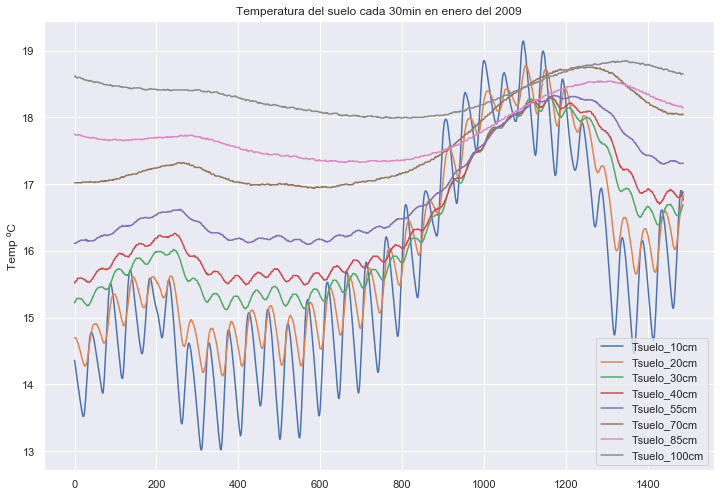

In [46]:
#Gráfica de temperaturas del suelo cada 30 min para enero del 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graf3_s.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo cada 30min en enero del 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T30SueloEnero",plt=2000)

In [48]:
#Ahora tomamos la temperatura del aire
df_graf3 = df_graf3.filter(['airT_Avg'],axis=1)
df_graf3=df_graf3.apply(pd.to_numeric,errors='coerce')
df_graf3.dtypes

airT_Avg    float64
dtype: object

<Figure size 864x595.44 with 0 Axes>

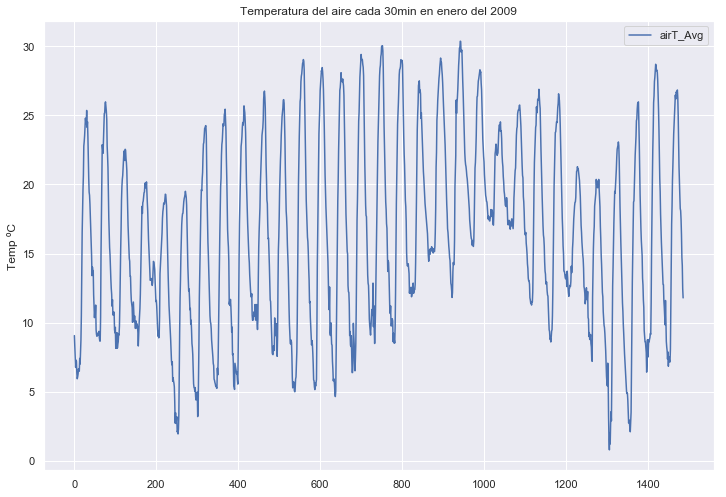

In [49]:
#Gráfica de temperatura del aire cada 30 min para enero del 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graf3.plot() ; plt.legend(loc='best')
plt.title("Temperatura del aire cada 30min en enero del 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T30AireEnero",plt=2000)

In [50]:
#Reproduciremos las gráficas aplicando el promedio móvil (rolling mean)

#Agregamos la variable fecha que desechamos anteriormente
df_10['FECHA']=df3['FECHA']
df_20['FECHA']=df3['FECHA']
df_40['FECHA']=df3['FECHA']
df_85['FECHA']=df3['FECHA']
df_graf2['FECHA']=df3['FECHA']


#Creamos un nuevo data frame para los promedios móviles
df_10roll = pd.DataFrame()
df_20roll = pd.DataFrame()
df_40roll = pd.DataFrame()
df_85roll = pd.DataFrame()
df_airTroll = pd.DataFrame()


#Calculamos el promedio móvil de cada una de las temperaturas
df_10roll["max10"]=df_10.Tsuelo_10cm_max.rolling(60, min_periods=1).mean()
df_10roll["min10"]=df_10.Tsuelo_10cm_min.rolling(60, min_periods=1).mean()
df_10roll["mean10"]=df_10.Tsuelo_10cm_mean.rolling(60, min_periods=1).mean()

df_20roll["max20"]=df_20.Tsuelo_20cm_max.rolling(60, min_periods=1).mean()
df_20roll["min20"]=df_20.Tsuelo_20cm_min.rolling(60, min_periods=1).mean()
df_20roll["mean20"]=df_20.Tsuelo_20cm_mean.rolling(60, min_periods=1).mean()

df_40roll["max40"]=df_40.Tsuelo_40cm_max.rolling(60, min_periods=1).mean()
df_40roll["min40"]=df_40.Tsuelo_40cm_min.rolling(60, min_periods=1).mean()
df_40roll["mean40"]=df_40.Tsuelo_40cm_mean.rolling(60, min_periods=1).mean()

df_85roll["max85"]=df_85.Tsuelo_85cm_max.rolling(60, min_periods=1).mean()
df_85roll["min85"]=df_85.Tsuelo_85cm_min.rolling(60, min_periods=1).mean()
df_85roll["mean85"]=df_85.Tsuelo_85cm_mean.rolling(60, min_periods=1).mean()

df_airTroll["max_air"]=df_graf2.airT_Avg_max.rolling(60, min_periods=1).mean()
df_airTroll["min_air"]=df_graf2.airT_Avg_min.rolling(60, min_periods=1).mean()
df_airTroll["mean_air"]=df_graf2.airT_Avg_mean.rolling(60, min_periods=1).mean()

<Figure size 864x595.44 with 0 Axes>

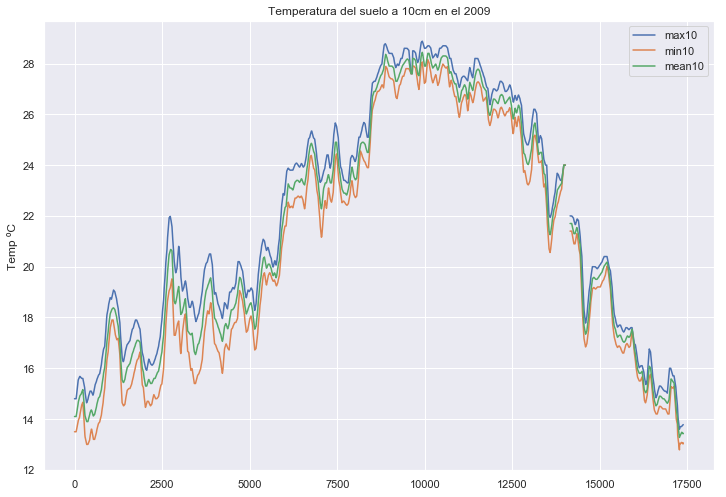

In [51]:
#Gráfica suavizada de la temperatura del suelo a 10cm para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_10roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10cm en el 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T10roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

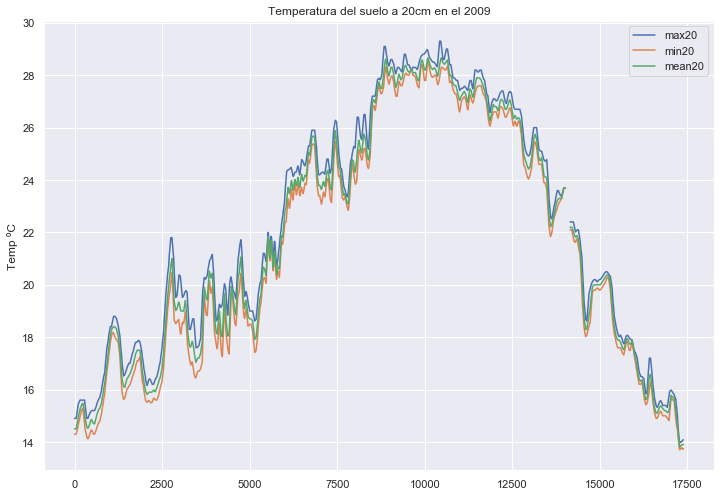

In [52]:
#Gráfica suavizada de la temperatura del suelo a 20cm para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_20roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 20cm en el 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T20roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

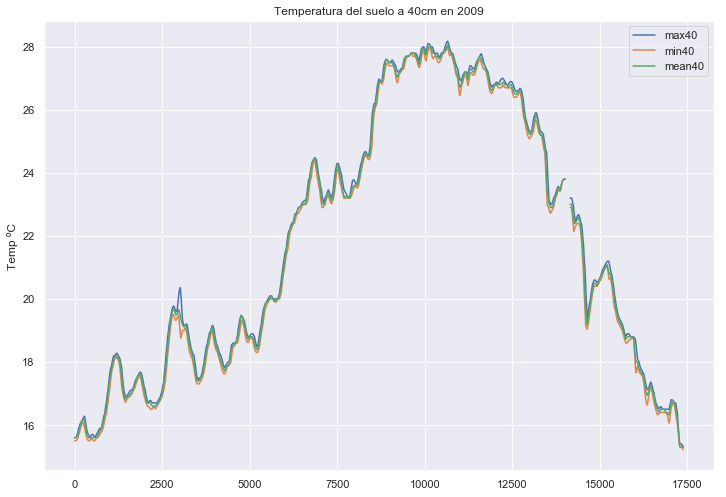

In [53]:
#Gráfica suavizada de la temperatura del suelo a 40cm para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_40roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 40cm en 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T40roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

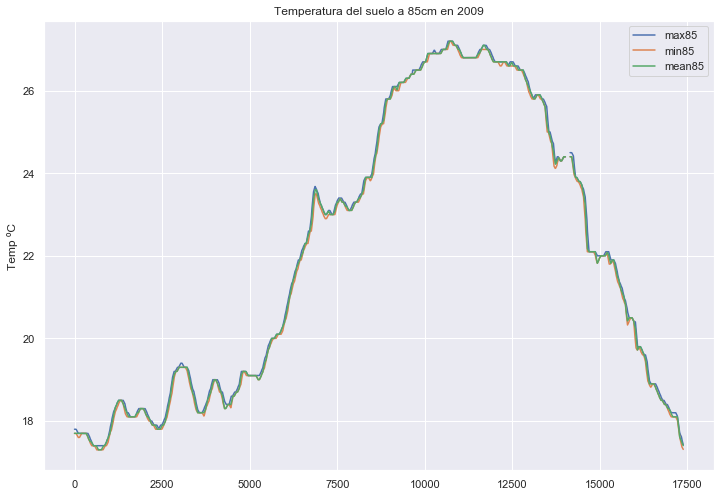

In [54]:
#Gráfica suavizada de la temperatura del suelo a 85cm para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_85roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 85cm en 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T85roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

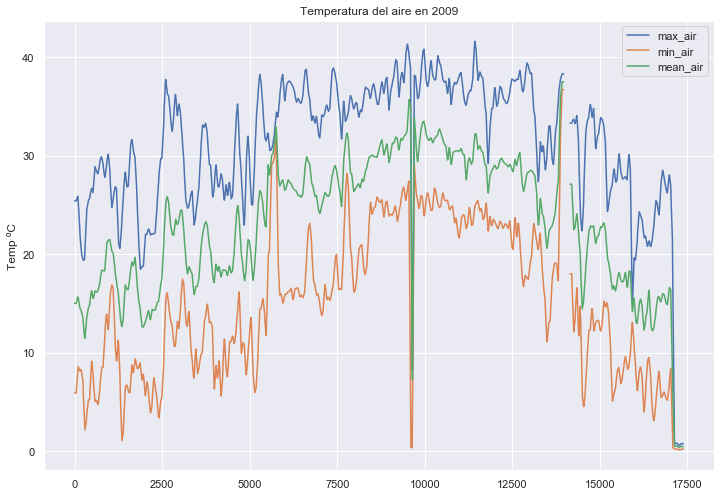

In [55]:
#Gráfica suavizada de la temperatura del aire para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_airTroll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del aire en 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("airTroll",plt=2000)